In [77]:
import pandas
import numpy
import matplotlib.pyplot as mp
mp.rcParams.update({'mathtext.default': 'regular'})

In [20]:
ds_crops = pandas.read_csv('/Users/baird/Downloads/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
ds_fert = pandas.read_csv('/Users/baird/Downloads/FAOSTAT/Environment_Fertilizers_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')

In [92]:
ds_crops[ds_crops['Area']=='United States of America'][:2]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1565470,231,United States of America,221,"Almonds, with shell",5312,Area harvested,1961,1961,ha,36138.0,NaN
1565471,231,United States of America,221,"Almonds, with shell",5312,Area harvested,1962,1962,ha,37676.0,NaN


In [91]:
ds_fert[ds_fert['Area']=='United States of America'][:2]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6392,231,United States of America,3102,Nutrient nitrogen N (total),5159,Average use per area of cropland,2002,2002,kg/ha,62.29,Fc
6393,231,United States of America,3102,Nutrient nitrogen N (total),5159,Average use per area of cropland,2003,2003,kg/ha,66.16,Fc


In [31]:
element_crops = ds_crops['Element'].values

In [47]:
element_fert = ds_fert['Element'].values
item_fert = ds_fert['Item'].values

In [90]:
#numpy.unique(element_crops)
numpy.unique(item_fert)

array(['Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
       'Nutrient potash K2O (total)'], dtype=object)

In [41]:
ds_crops_us_yield = ds_crops[(ds_crops['Element']=='Yield') & (ds_crops['Area']=='United States of America') \
          & (ds_crops['Item']=='Wheat')]
ds_crops_us_prod = ds_crops[(ds_crops['Element']=='Production') & (ds_crops['Area']=='United States of America') \
          & (ds_crops['Item']=='Wheat')]

#ds_crops_us_yield.plot(x='Year',y='Value')

wheat_us_yield = ds_crops_us_yield['Value'].values
year_us_yield = ds_crops_us_yield['Year'].values
wheat_us_prod = ds_crops_us_prod['Value'].values
year_us_prod = ds_crops_us_prod['Year'].values

In [55]:
ds_fert_us = ds_fert[(ds_fert['Area']=='United States of America') & (ds_fert['Item']=='Nutrient nitrogen N (total)')]

year_us_fert = ds_fert_us['Year'].values
data_us_fert = ds_fert_us['Value'].values

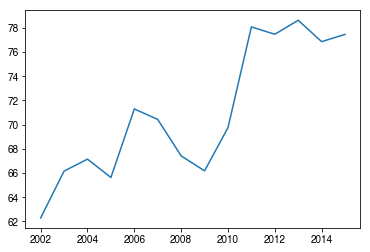

In [78]:
mp.plot(year_us_fert, data_us_fert)

Text(0.5,0,'year')

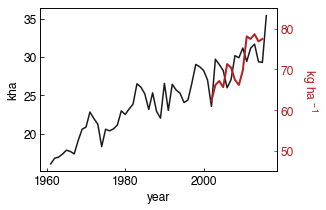

In [89]:
fontsize = 12

fig = mp.figure(figsize=(4.25,3))
ax = fig.add_subplot(111)
ax.plot(year_us_yield, wheat_us_yield/1000., c='0.1')

ax2 = ax.twinx()
ax2.plot(year_us_fert, data_us_fert, c='firebrick', lw=2)
ax2.set_ylim(45,85)
ax2.tick_params(labelsize=fontsize, direction='in')
ax2.set_yticks([50,60,70,80])
ax2.set_ylabel('kg ha$^{\,-1}$', fontsize=fontsize, rotation=-90, labelpad=25, color='firebrick')
#ax2.spines['right'].set_color('firebrick')
#ax2.xaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='firebrick')

ax.tick_params(labelsize=fontsize, direction='in')
ax.set_ylabel('kha', fontsize=fontsize)
ax.set_xlabel('year', fontsize=fontsize)